In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
    
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#set inspector variable
inspector = inspect(engine)

In [10]:
# access columns and data types for Measurement

columns = inspector.get_columns('Measurement')
# columns

In [11]:
# print just column names for Measurement
for c in columns:
    print(c['name'])

id
station
date
prcp
tobs


In [12]:
# access columns and data types for Station
columns = inspector.get_columns('Station')
# columns

In [13]:
# print just column names for Station
for c in columns:
    print(c['name'])

id
station
name
latitude
longitude
elevation


In [14]:
# Find the most recent date in the data set.
max_date = session.query(func.max(Measurement.date)).all()
max_date

[('2017-08-23')]

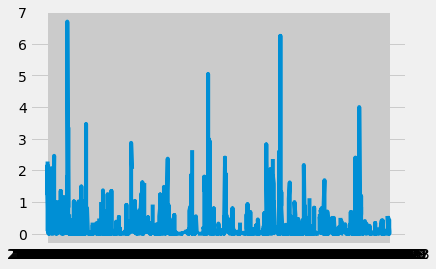

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(query_date)

# Perform a query to retrieve the date and precipitation scores
twelve_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()
# twelve_months

# Save the query results as a Pandas DataFrame and set the index to the date column
twelve_months_df = pd.DataFrame(twelve_months)
# twelve_months_df

# Sort the dataframe by date
twelve_months_df = twelve_months_df.sort_values('date', ascending=True)
twelve_months_df
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = twelve_months_df['date']
y_axis = twelve_months_df['prcp']

plt.plot(x_axis, y_axis)
plt.show()



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [17]:
# Close Session
session.close()